# SMS Spam Classifier: Naive Bayes ML Algorithm




## Imports

In [1]:
# load libraries
import os
from joblib import dump, load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer
)

from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score
)


##  Load data

In [2]:
# load data
path = '~/workspace/data-science/my-projects/SMS-Spam-Classifier-App-master/ham-or-spam-nb-classifier/data/processed/'

df = pd.read_csv(path + 'spam_processed.csv', delimiter=',', encoding='latin-1')
df.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Text preprocessing and Feature Generation using Bag of Words
---

All the messages part in our data are in text form. Thus, our Naive Bayes algorithm won't work if this is not taking care of.  In other words, we need to represent our text in to a vector form that our algorithm will be able to use for classification purposes.  This is usually known as converting a **corpus** into a **vector** format.


We will use **CountVectorizer** from scikit-learn to convert a collection of text documents into a matrix of token counts.

+ CountVectorizer  
+ TfidfVectorizer

In [3]:
df.columns

Index(['label', 'message', 'length'], dtype='object')

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

We need to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number. Let's use this by using scikit-learn's CountVectorizer and nltk RegexTokenizer to remove unwanted elements from our data like symbols and numbers we might it missed.

In [4]:
# tokinize message just in case we missed some numbers or other chars
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# generate document term matrix by using scikit-learn's CountVectorizer()
# Return a function that splits a string into a sequence of tokens
cv = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 1),
    tokenizer= token.tokenize
)

### Split data

In [5]:
X = cv.fit_transform(df['message'])
y= df['label']

In [6]:
print(cv.get_feature_names())

s', 'salesman', 'salmon', 'salon', 'salt', 'sam', 'samachara', 'samantha', 'sambar', 'samus', 'sandiago', 'sane', 'sang', 'sankatmochan', 'sankranti', 'santa', 'santacalling', 'sao', 'sapna', 'sar', 'sara', 'sarasota', 'sarcasm', 'sarcastic', 'saristar', 'sariyag', 'sary', 'sashimi', 'sat', 'satanic', 'sathy', 'sathya', 'satisfied', 'satisfy', 'satsgettin', 'saturday', 'saucy', 'savamob', 'save', 'saved', 'saves', 'savings', 'saw', 'say', 'sayin', 'saying', 'says', 'sayy', 'sc', 'scallies', 'scammers', 'scarcasim', 'scared', 'scary', 'scenario', 'scenery', 'sch', 'schedule', 'school', 'schools', 'science', 'scold', 'scool', 'scorable', 'score', 'scores', 'scoring', 'scotch', 'scotland', 'scotsman', 'scouse', 'scraped', 'scrappy', 'scratches', 'scratching', 'scream', 'screamed', 'screaming', 'screen', 'screwd', 'scrounge', 'scrumptious', 'sculpture', 'sd', 'sday', 'sdryb8i', 'se', 'sea', 'search', 'searching', 'season', 'seat', 'sec', 'second', 'secondary', 'seconds', 'secret', 'secreta

In [7]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Model Building and Evaluation

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. 

In [8]:
# split train/test 
X_train, X_test, y_train, y_test = train_test_split(
                                            X, y, test_size=0.3,
                                            random_state=23
                                            )

In [9]:
# Naive Bayes Classifier
clf = MultinomialNB()

In [10]:
# train data using X_train and y_train 
clf.fit(X_train,y_train)

MultinomialNB()

In [11]:
# make class predictions for X_test
y_pred = clf.predict(X_test)

In [12]:
# Check the accuracy, precision, recall and f1 score
print('Accuracy score: {}.'.format(accuracy_score(y_test, y_pred) *100))
print('Precision score: {}'.format(precision_score(y_test, y_pred) * 100))
print('Recall score: {}'.format(recall_score(y_test, y_pred) * 100))
print('F1 score: {}'.format(f1_score(y_test, y_pred) * 100))

Accuracy score: 98.08612440191388.
Precision score: 89.76744186046511
Recall score: 95.07389162561576
F1 score: 92.3444976076555


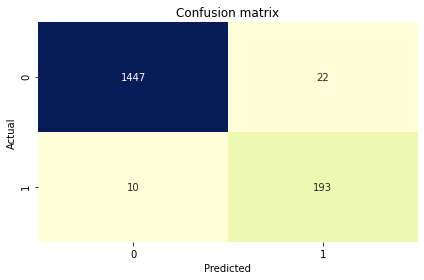

In [13]:
# print the confusion matrix to evaluate the accuracy of a classification.
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, fmt="d", cmap='YlGnBu', cbar=False)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show();

The classifier made a total of 1,672 predictions.  Out of those 1,672 predictions the classifier predicted 'spam' {1} - 215 times and for 'ham'{0} - 1,457 times.  In reality (Actual) 203 are 'spam' {1} and 1,469 are 'ham' {0}.  Not that bad.



In [14]:
# Compute Area Under the Receiver Operating Characteristic Curve
# (ROC AUC)
roc_auc_score(y_test, y_pred) * 100

96.7881370993974

 AUC measures the quality of the model's predictions irrespective of what classification threshold is chosen. 
Without doing any hyperparameters our model seems to have done very good.

### Testing  model

In [15]:
# Sample Prediction
comment = ["Hello, how are you?"]
sentence = cv.transform(comment).toarray()

In [16]:
clf.predict(sentence)

array([0])

In [17]:
class_dict = {'ham': 0, 'spam': 1}

In [18]:
class_dict.values()

dict_values([0, 1])

In [19]:
if clf.predict(sentence) == 1:
    print("Spam")
else:
    print("Ham")

Ham


### Save the Model 

In [20]:
import os
from joblib import dump, load
# import joblib

dirname = os.path.dirname('/home/paul/workspace/data-science/my-projects/using-nlp-for-naive-bayes-classification/SMS-Spam-Classifier-App-master/')

file_name = os.path.join(dirname, 'ham-or-spam-nb-classifier/models/model.joblib')

dump(clf, file_name)

['/home/paul/workspace/data-science/my-projects/using-nlp-for-naive-bayes-classification/SMS-Spam-Classifier-App-master/ham-or-spam-nb-classifier/models/model.joblib']

### Load and test the saved model

In [21]:
# load saved model
path = '/home/paul/workspace/data-science/my-projects/SMS-Spam-Classifier-App-master/ham-or-spam-nb-classifier/models/'
saved_model = load(path + 'model.joblib')

In [22]:
# Calculate the accuracy and predictions
score = saved_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
y_pred= saved_model.predict(X_test)

Test score: 98.09 %


In [23]:
# make class predictions for X_test
y_pred = clf.predict(X_test)

In [24]:
# Sample Prediciton 
comment2 = ["Hey, you have won a prize"]
sentence2 = cv.transform(comment2).toarray()
saved_model.predict(sentence2)

array([1])

In [25]:
# example 2
if saved_model.predict(sentence2) == 1:
    print("Spam")
else:
    print("Ham")

Spam


Our model seems to be working properly.